## 画像コンペ

In [1]:
def get_jpg_name(path):
    import os 
    img_files = os.listdir(path)
    return [jpg for jpg in img_files if ".jpg" in jpg]

In [2]:
basepath = "../first_retailing/"
train_img_files = get_jpg_name(basepath+"train/")
test_img_files = get_jpg_name(basepath+"test/")

In [3]:
from PIL import Image

i = 0
file_name = basepath + "train/" + train_img_files[i]
img = Image.open(file_name)

#pixelデータを取得
pixel = img.getdata()

print("合計ピクセル数は、%sで、サイズは%s*%s"%(len(pixel),img.size[0],img.size[1]))

%matplotlib inline

合計ピクセル数は、444889で、サイズは667*667


In [4]:
#訓練データの正解データ
import pandas as pd
import seaborn as sns

train = pd.read_csv(basepath+"train_master.tsv", sep="\t")

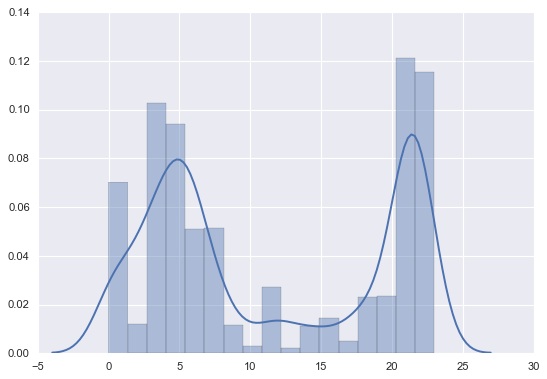

In [5]:
#histogram
sns.distplot(train["category_id"].values)

In [6]:
a = train["category_id"].values
a

array([21, 22, 11, ...,  5,  7,  0])

## ラベリング

[カラーコード参照元](http://www.colordic.org/)

In [7]:
import numpy as np

white = np.asarray([255,255,255])
off_white = np.asarray([230,230,230])
light_gray = np.asarray([211,211,211])
gray = np.asarray([128,128,128])
dark_gray = np.asarray([169,169,169])
black = np.asarray([0,0,0])
pink = np.asarray([255,192,203])
red = np.asarray([255,0,0])
wine = np.asarray([179,62,92])
orange = np.asarray([255, 165, 0])
dark_orange= np.asarray([255,140,0])
natural = np.asarray([175,175,175]) #
beige = np.asarray([245,245,220])
khaki = np.asarray([240,230,140])
brown = np.asarray([165,42,42])
dark_brown = np.asarray([101, 67, 33])
yellow = np.asarray([255,255,0])
light_green = np.asarray([144,238,144])
green = np.asarray([0,128,0])
olive = np.asarray([128,128,0])
dark_green = np.asarray([0,100,0])
blue = np.asarray([0,0,255])
navy = np.asarray([0,0,128])
purple = np.asarray([128,0,128])

## 計算

In [8]:
#main
from progressbar import ProgressBar
import time

color_list = [white, off_white, light_gray, gray, dark_gray, black, 
              pink, red, wine, orange, dark_orange, natural, beige, 
              khaki, brown, dark_brown, yellow, light_green, green,
              olive, dark_green, blue, navy, purple]

#色との距離を計算して、最も近い色を出す
def predict_by_distance(pixel):
    p = ProgressBar( maxval=len(pixel)) 
    
    color_dict = {v:0 for v in range(len(color_list))}
    for i in range(len(pixel)):
        if pixel[i] != (255,255,255):  #背景を無視
            color = np.argmin([np.linalg.norm(color - pixel[i]) for color in color_list])
            color_dict[color] = color_dict[color] + 1
            
        p.update(i+1)
    
    #予測
    pred = max(color_dict, key=color_dict.get)
    return pred

#画像のpixelを作成
def get_img_array(path,resize):
    img_array = Image.open(path).resize([resize,resize]).getdata()
    return img_array

#画像を表示
def show_img(path):
    img_array = Image.open(path).resize([200,200])
    img_array.show()

#精度
def M_accuracy(train, pred):
    pred_dict = {v:0 for v in range(len(color_list))}
    num_dict = {v:0 for v in range(len(color_list))}
    for i in range(len(pred)):
        if train["category_id"].values[i] == pred[i]:
            pred_dict[train["category_id"].values[i]] = pred_dict[train["category_id"].values[i]] + 1
            num_dict[train["category_id"].values[i]] = num_dict[train["category_id"].values[i]] + 1
        else:
            num_dict[train["category_id"].values[i]] = num_dict[train["category_id"].values[i]] + 1
    return np.mean([pred_dict[k]/num_dict[k] for k in range(len(pred_dict)) if num_dict[k] != 0])

import pickle

#pickle書き出し(<4GB)
def write_pickle(pickle_path,v):
    with open(pickle_path, mode='wb') as f:
        pickle.dump(v, f)
    print("Finished Writing pickle")

#pickle 読み込み 
def read_pickle(pickle_path):
    with open(pickle_path, mode='rb') as f:
        read = pickle.load(f)
    return read


def get_jpg_name(path):
    import os 
    img_files = os.listdir(path)
    return [jpg for jpg in img_files if ".jpg" in jpg]    

In [11]:
#実行部分(trainデータ)
img_files = os.listdir(basepath+"train/")

predict_color = []
for f in range(len(img_files)):
    #filenameを取得
    file_name = basepath + "train/train_%s.jpg"%(f)
    #pixelデータに変換
    img_array = get_img_array(file_name,100)
    #一番多い色の数を取得
    predict_color.append(predict_by_distance(img_array))

 98% ( 9874 of 10000) |################### | Elapsed Time: 0:00:00 ETA: 0:00:00

In [9]:
#実行部分(testデータ)

submit = []
for f in range(len(test_img_files)):
    #filenameを取得
    file_name = basepath + "test/test_%s.jpg"%(f)
    #pixelデータに変換
    img_array = get_img_array(file_name,50)
    #一番多い色の数を取得
    submit.append(["test_%s.jpg"%(f),predict_by_distance(img_array)])

 98% (2469 of 2500) |##################### | Elapsed Time: 0:00:00 ETA: 0:00:00

In [13]:
pd.DataFrame(submit).to_csv("/Users/Chang/Desktop/submission.csv",header=None, index=None)

In [12]:
M_accuracy(train,predict_color)

0.15781248133908141